In [1]:
import pandas as pd
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [2]:
df.describe

<bound method NDFrame.describe of        company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors          

In [3]:
df.info

<bound method DataFrame.info of        company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors            

In [4]:
inputs = df.drop("salary_more_then_100k", axis = 'columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [5]:
targets = df['salary_more_then_100k']
targets

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [9]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [10]:
#inputs.drop(['company', 'job', 'degree'], axis='columns', inplace=True)
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, targets)

DecisionTreeClassifier()

In [12]:
model.score(inputs_n, targets)

1.0

In [13]:
model.predict([[2,1,0]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Exercise

In [14]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [16]:
inputs = data.drop('Survived', axis = 'columns')
targets = data.Survived

In [17]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,2,19.0,30.0000
888,3,2,NaN,23.4500
889,1,1,26.0,30.0000


In [18]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [19]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,targets,test_size=0.3)

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [23]:
model.score(X_test, y_test)

0.7985074626865671

# Random Forest

In [24]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [26]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

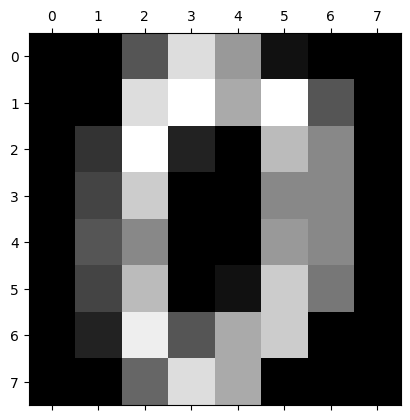

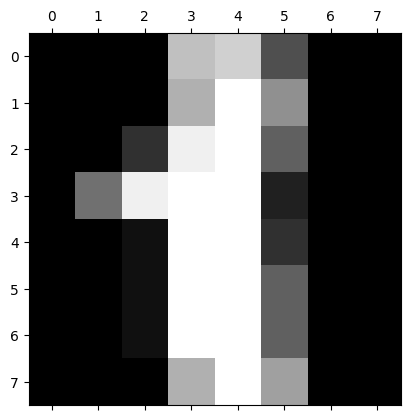

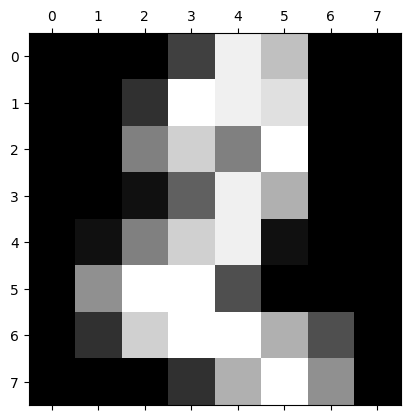

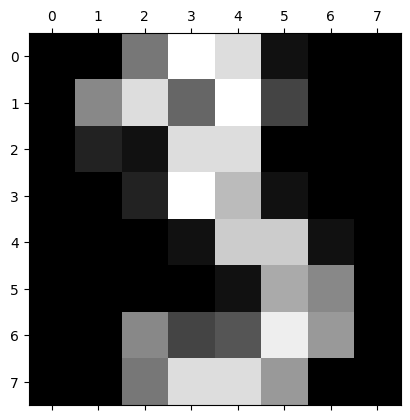

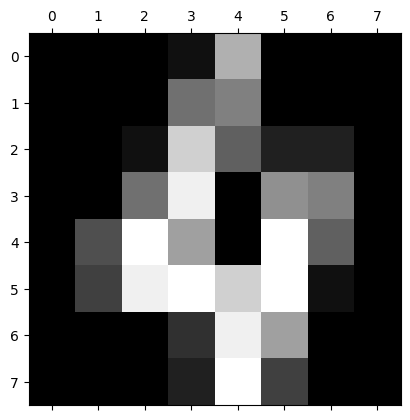

In [27]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    

In [28]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [29]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [30]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [32]:
X = df.drop("target", axis ='columns')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [33]:
y = df.target
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
len(X_train)

1437

In [36]:
len(X)

1797

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [38]:
model.score(X_test, y_test)

0.9638888888888889

In [39]:
y_pred = model.predict(X_test)
y_pred

array([2, 0, 6, 2, 9, 1, 8, 1, 9, 3, 2, 9, 7, 9, 8, 1, 8, 2, 9, 0, 6, 3,
       2, 5, 4, 7, 7, 6, 0, 2, 3, 1, 2, 8, 7, 4, 5, 2, 9, 6, 5, 4, 4, 9,
       4, 5, 5, 4, 1, 6, 4, 7, 4, 9, 1, 8, 4, 9, 3, 8, 7, 0, 9, 3, 7, 2,
       8, 7, 7, 0, 2, 2, 4, 9, 1, 5, 1, 7, 4, 7, 7, 6, 7, 2, 1, 6, 2, 8,
       3, 1, 0, 3, 3, 9, 6, 6, 9, 5, 1, 3, 8, 5, 5, 5, 8, 1, 1, 3, 7, 2,
       1, 5, 5, 5, 2, 9, 5, 6, 3, 1, 9, 8, 5, 1, 9, 4, 4, 8, 0, 7, 0, 7,
       3, 0, 2, 3, 1, 8, 8, 4, 1, 2, 1, 7, 9, 7, 3, 1, 5, 1, 0, 6, 4, 4,
       6, 9, 1, 2, 9, 4, 8, 3, 8, 3, 0, 3, 9, 9, 9, 8, 1, 2, 7, 5, 0, 2,
       9, 5, 6, 7, 3, 0, 3, 2, 1, 7, 7, 4, 4, 9, 2, 3, 1, 0, 2, 2, 3, 3,
       1, 6, 5, 3, 3, 8, 3, 7, 8, 7, 0, 5, 1, 9, 5, 3, 7, 4, 0, 1, 6, 5,
       5, 5, 0, 5, 4, 5, 0, 8, 7, 0, 0, 7, 1, 0, 9, 8, 9, 3, 4, 2, 6, 7,
       2, 7, 2, 2, 7, 4, 4, 6, 4, 4, 7, 0, 3, 1, 1, 4, 3, 6, 6, 2, 1, 9,
       1, 3, 4, 5, 0, 3, 4, 0, 3, 6, 2, 7, 7, 6, 9, 2, 0, 1, 1, 9, 0, 8,
       6, 0, 3, 6, 9, 0, 8, 4, 7, 7, 2, 2, 5, 4, 7,

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

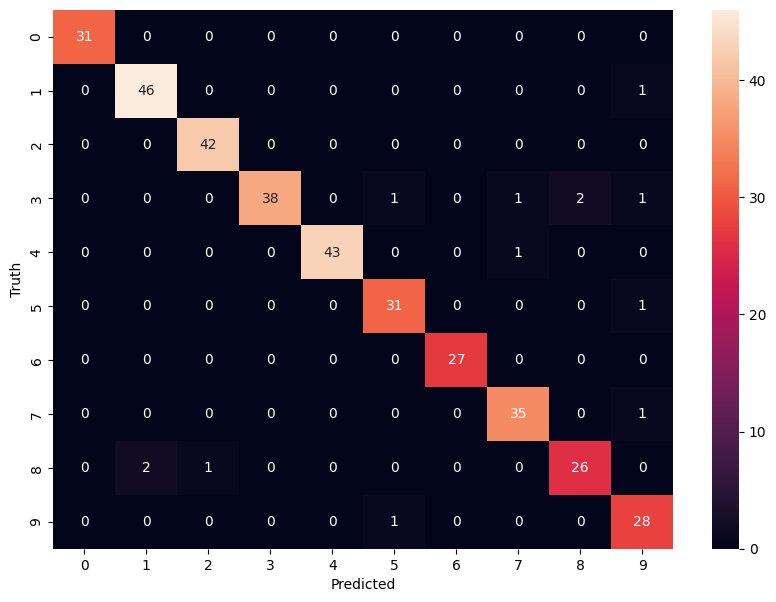

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel('Truth')

# Exercise
Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)

Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [43]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

In [46]:
iris_model = model = RandomForestClassifier()
iris_model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
iris_model.predict(X_test)

array([2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1,
       2, 2, 2, 2, 2, 1, 1, 0])

In [48]:
iris_model.score(X_test, y_test)

0.9666666666666667

In [49]:
iris_model = RandomForestClassifier(n_estimators=40)
iris_model.fit(X_train, y_train)
iris_model.score(X_test, y_test)

0.9666666666666667

In [50]:
y_predict = model.predict(X_test)
confusion_m = confusion_matrix(y_test, y_predict)
confusion_m

array([[ 8,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

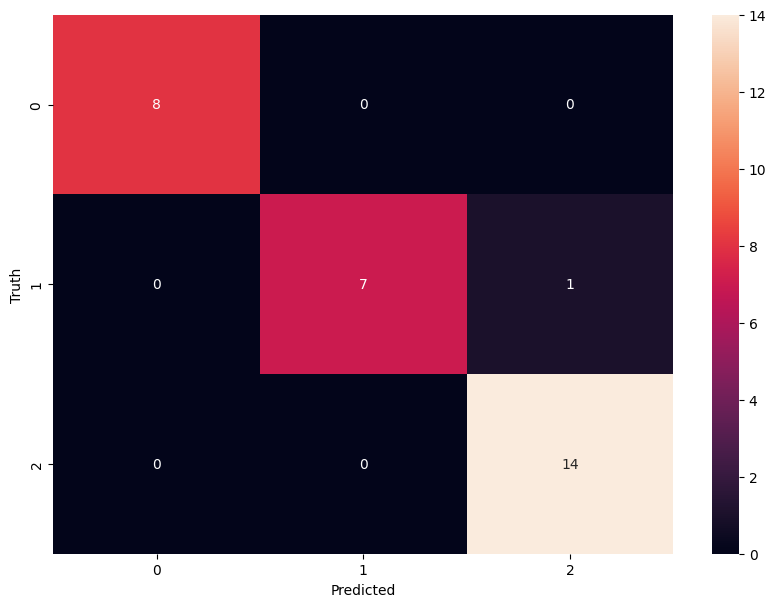

In [51]:
plt.figure(figsize=(10, 7))
sn.heatmap(confusion_m, annot=True)
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Example 2
I have used the Predicting a Pulsar Star dataset for this project.

In [1]:
data = pd.read_csv("pulsar_star.csv")
data.head()

NameError: name 'pd' is not defined